In [1]:
import sys
sys.path.append('../src/')

from almaDatabaseQuery import *

import matplotlib.pyplot as plt
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.basemap import Basemap # need to install basemap and geos 
from allskymap import AllSkyMap # need to install pyproj

%matplotlib inline

In [2]:
q = databaseQuery()
report, resume = q.select_object_from_sqldb("calibrators_brighterthan_0.1Jy_20180419.db", \
                                    maxFreqRes=999999999, array='12m', \
                                    excludeCycle0=True, \
                                    selectPol=False, \
                                    minTimeBand={3:60., 6:60., 7:60.}, \
                                    silent=True, nonALMACAL=True)

Number of accepted source:  134


In [3]:
resume[0]

['J2253+1608',
 343.4906164208333,
 16.14821135277778,
 '3C 454.3',
 343.49061999999998,
 16.148209999999999,
 0.85899999999999999,
 30,
 56,
 86.11110391202152,
 -38.1837784919047]

In [4]:
ra, dec, glon, glat, nproj = [], [], [], [], []
for i,idata in enumerate(resume):
    ra.append(idata[1])
    dec.append(idata[2])
    glon.append(idata[9])
    glat.append(idata[10])
    nproj.append(10*np.log(idata[7]))

### Equatorial coordinate

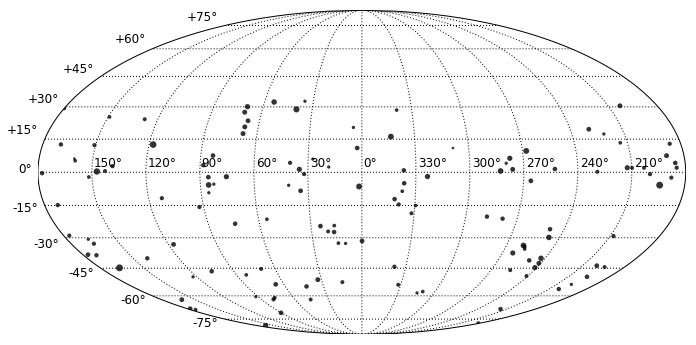

In [5]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=1, dashes=[1,2], labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-150,151,30), linewidth=1, dashes=[1,2])

x, y = m(ra, dec)
cr_pts = m.scatter(x, y, s=(nproj), c='k', marker='o', linewidths=0.5, edgecolors='none', alpha=0.8)

# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=12, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right

plt.show()

### Galactic coordinate

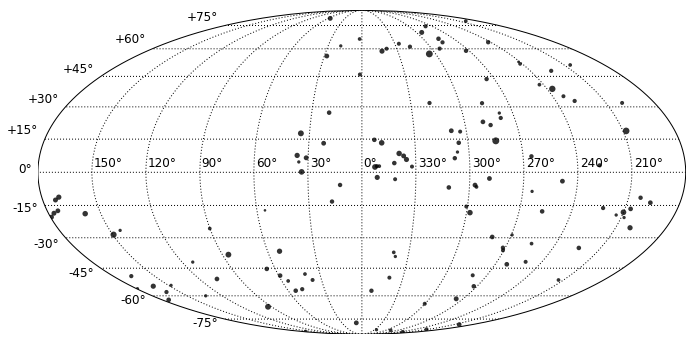

In [6]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=1, dashes=[1,2], labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-150,151,30), linewidth=1, dashes=[1,2])

x, y = m(glon, glat)
cr_pts = m.scatter(x, y, s=(nproj), c='k', marker='o', linewidths=0.5, edgecolors='none', alpha=0.8)

# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=12, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right

plt.show()